In [41]:
import numpy as np
import matplotlib.pyplot as plt

---
### Load diabetes data set.

In [83]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
y -= y.mean()
features = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetesdf = pd.DataFrame(diabetes.data, columns=features)
diabetesdf.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


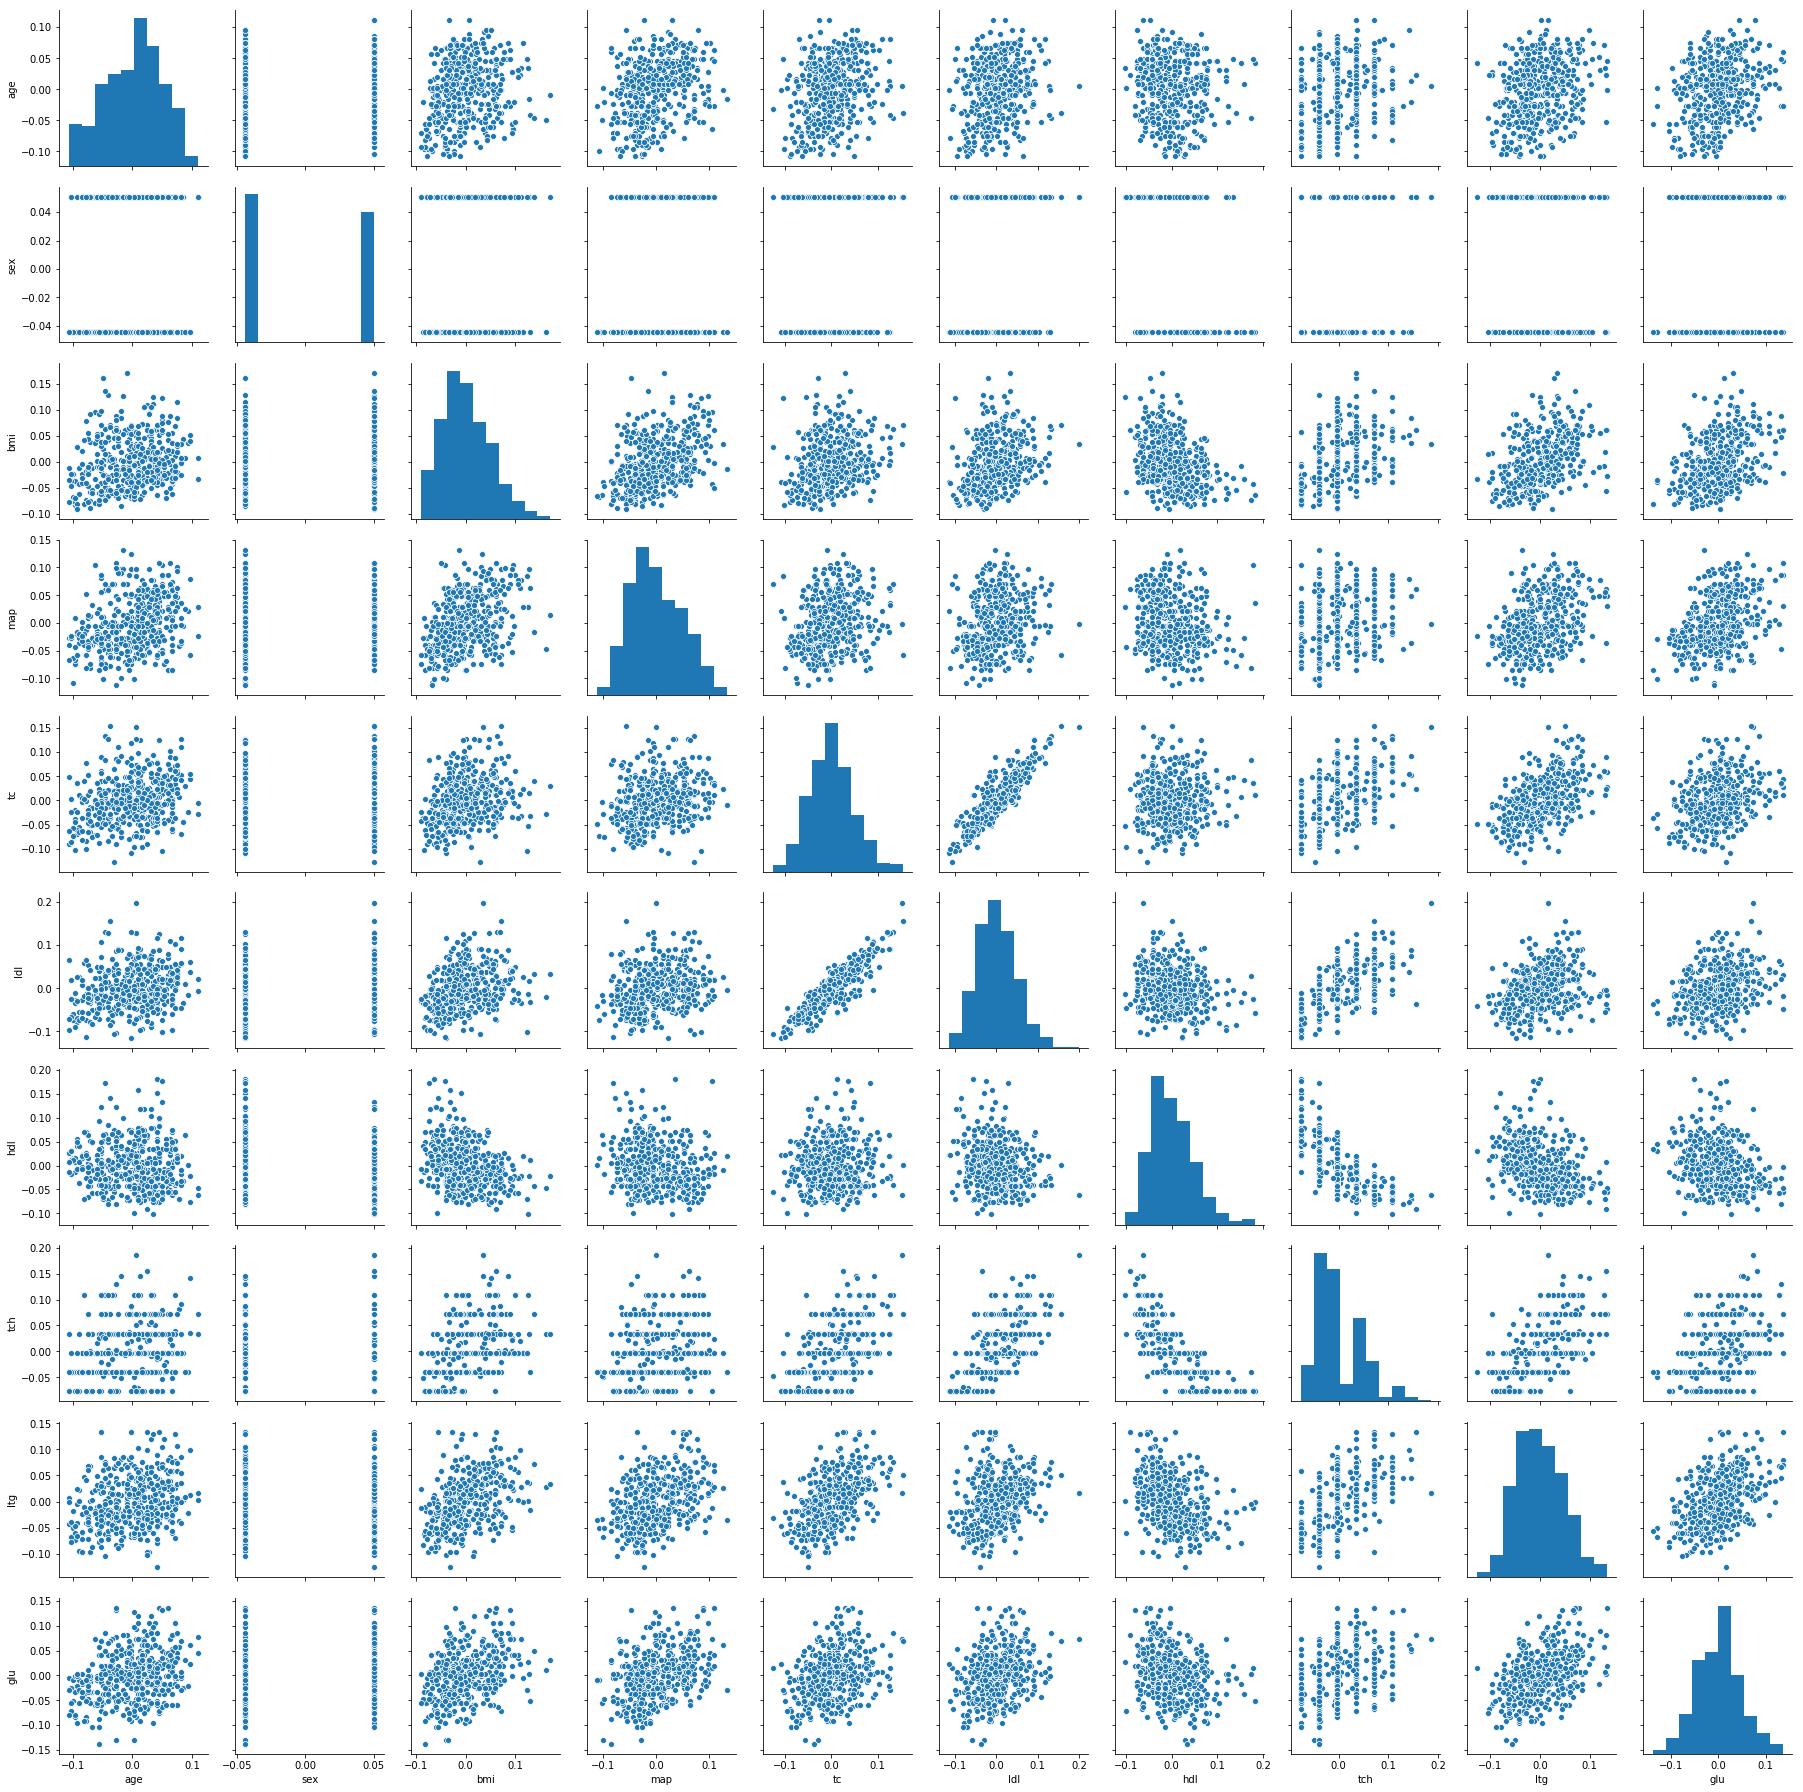

In [65]:
import seaborn as sns

sns.pairplot(diabetesdf);

---
### Ordinary least squares (OLS) regression.

In [84]:
beta, sse, rank, sing = np.linalg.lstsq(X, y, rcond=None)
beta

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [150]:
from sklearn.linear_model import LinearRegression

olsmodel = LinearRegression()
olsmodel.fit(X, y)
olsmodel.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [86]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.38
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           2.68e-62
Time:                        00:36:14   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     432   BIC:                             4833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -10.0122     59.680     -0.168      0.867    -127.311     107.287
x2          -239.8191     61.151     -3.922      0.000    -360.010    -119.628
x3           519.8398     66.457      7.822      0.000     389.221     650.458
x4           324.3904     65.346      4.964      0.000     195.954     452.826
x5          -792.1842    416.201     -1.903      0.058   -1610.216      25.847
x6           476.7458    338.642      1.408      0.160    -188.845    1142.336
x7           101.0446    212.286      0.476      0.634    -316.198     518.287
x8           177.0642    161.289      1.098      0.273    -139.944     494.072
x9           751.2793    171.703      4.375      0.000     413.802    1088.756
x10           67.6254     65.908      1.026      0.305     -61.914     197.165
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
results.params

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [57]:
results.bse

array([ 59.6799917 ,  61.15141671,  66.45651102,  65.34617833,
       416.20137324, 338.64187959, 212.28645979, 161.28862465,
       171.70289779,  65.90779797])

---
### How does the model prediction compare to the target (disease progression $y$)?

# $yfit = \sum_i X[:,i] * \beta[i]$

In [87]:
X.shape, y.shape, beta.shape

((442, 10), (442,), (10,))

### Exercise: Compute $yfit$ using a for loop.

In [88]:
yfit = np.zeros(y.shape)
???

yfit.shape

(442,)

# $yfit = X * \beta$

In [89]:
np.allclose(yfit, X @ beta)

True

In [90]:
np.allclose(yfit, olsmodel.predict(X))

True

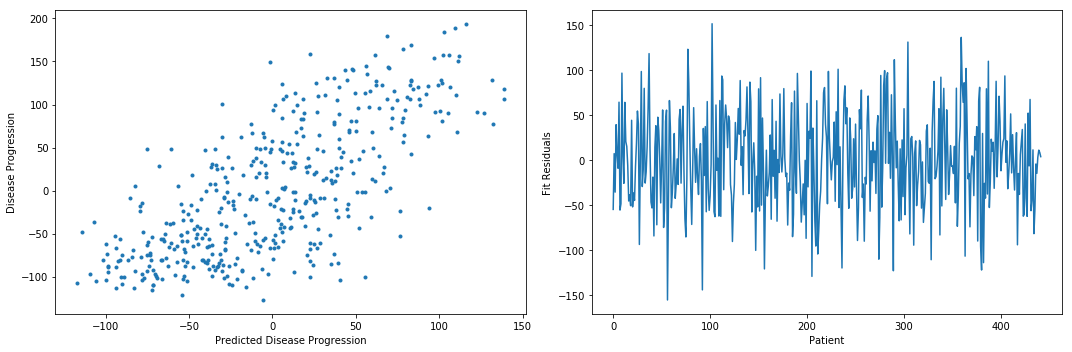

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(yfit, y, '.')
ax[0].set_xlabel('Predicted Disease Progression')
ax[0].set_ylabel('Disease Progression')

residuals = y - yfit

ax[1].plot(residuals)
ax[1].set_xlabel('Patient')
ax[1].set_ylabel('Fit Residuals')

fig.tight_layout()

---
### Are residuals normally distributed? Is the variance of the residuals constant?

In [92]:
from scipy.stats import normaltest

normaltest(residuals)  # p-value is for null hypothesis that data are normal

NormaltestResult(statistic=1.505808950808637, pvalue=0.47099656621593666)

---
### How well did the model do?

# $SSE = \sum_i (y_i - yfit_i)^2$

# $SST = \sum_i (y_i - mean(y))^2$

# $R^2 = 1 - \frac{SSE}{SST}$

In [93]:
residuals = y - yfit

# SSE: sum of squared errors
print("SSE from np.linalg.lstsq:", sse)
sse = ???
print("SSE by hand:", sse)

# MSE: mean squared error
mse = ???
print("MSE:", mse)

# RMSE: root mean squared error
rmse = np.sqrt(mse)
print("MSE:", rmse)

# R^2: fraction of variance in target ym explained by the model
sst = np.sum((y - y.mean())**2)
r2 = 1 - sse / sst
print("R^2:", r2)

SSE from np.linalg.lstsq: [1263983.15625549]
SSE by hand: 1263983.156255485
MSE: 2859.6903987680657
MSE: 53.47607314274362
R^2: 0.5177494254132934


---
### All wrapped up nice and easy for you.

In [97]:
olsmodel = LinearRegression()
olsmodel.fit(X, y)
print("beta:", olsmodel.coef_)

yfit = olsmodel.predict(X)
print("MSE:", np.mean((y - yfit)**2))
print("R^2:", olsmodel.score(X, y))

beta: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
MSE: 2859.6903987680657
R^2: 0.5177494254132934


---
### Excercise: Refit the data for 100 random patients. Repeat this five times and compare the fit weights with the fit to all 442 patients.

In [ ]:
numpatients = X.shape[0]  # 442

plt.figure(figsize=(15, 5))
xticks = np.arange(len(features))
plt.bar(xticks-0.25, beta, width=0.1, label='all')

for i in range(5):
    # fit model to 100 random patients
    patients = ??? # get 100 random patient indexes
    model = LinearRegression()
    model.fit( ??? )
    
    # add fit weights to plot
    plt.bar(xticks-0.15+i*0.1, model.coef_, width=0.1, label='100')

plt.xticks(xticks, labels=features)
plt.ylabel('Weight')
plt.legend();

# Ridge Regularization

# Error to be minimized $= SSE + \lambda \sum_j \beta_j^2$

In [103]:
yfit = olsmodel.predict(X)
print("OLS MSE:", np.mean((y - yfit)**2))
print("OLS R^2:", olsmodel.score(X, y))

OLS MSE: 2859.6903987680657
OLS R^2: 0.5177494254132934


In [144]:
from sklearn.linear_model import Ridge

ridgemodel = Ridge(alpha=1, fit_intercept=False)
ridgemodel.fit(X, y)
print("beta:", ridgemodel.coef_)

yfit = ridgemodel.predict(X)
print("Ridge a=1 MSE:", np.mean((y - yfit)**2))
print("Ridge a=1 R^2:", ridgemodel.score(X, y))

beta: [  29.46574564  -83.15488546  306.35162706  201.62943384    5.90936896
  -29.51592665 -152.04046539  117.31171538  262.94499533  111.878718  ]
Ridge a=1 MSE: 3254.134664586203
Ridge a=1 R^2: 0.4512313946799055


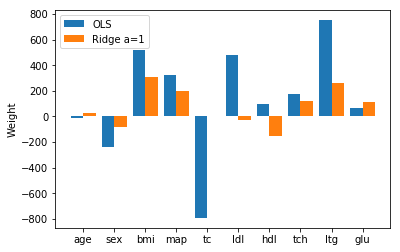

In [101]:
xticks = np.arange(len(features))
plt.bar(xticks-0.2, olsmodel.coef_, width=0.4, label='OLS')
plt.bar(xticks+0.2, ridgemodel.coef_, width=0.4, label='Ridge a=1')
plt.xticks(xticks, labels=features)
plt.ylabel('Weight')
plt.legend();

### Exercise: Write a loop that performs ridge regression for various values of $\lambda$ and keeps track of the MSE for each fit.

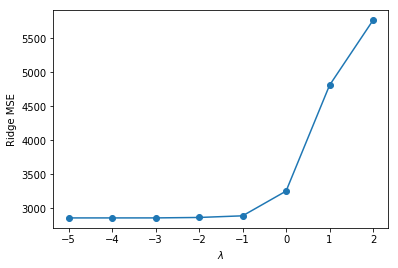

In [156]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
MSE_vs_alpha = []
for alpha in alphas:
    ???
    MSE_vs_alpha.append( ??? )

plt.plot(np.log10(alphas), MSE_vs_alpha, 'o-')
plt.xlabel('$\lambda$')
plt.ylabel('Ridge MSE');

In [123]:
np.argmin(MSE_vs_alpha)

0

### Smallest $\lambda$ is best. But then absolute best would be $\lambda = 0$, which is just plain old OLS. Did ridge regularization not help?

In [162]:
from sklearn.linear_model import RidgeCV

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
ridgemodel = RidgeCV(alphas, store_cv_values=True)
ridgemodel.fit(X, y)
print("beta:", ridgemodel.coef_)
print("$\lambda$:", ridgemodel.alpha_)

yfit = ridgemodel.predict(X)
print("Ridge MSE:", np.mean((y - yfit)**2))
print("Ridge R^2:", ridgemodel.score(X, y))

beta: [  -7.19945679 -234.55293001  520.58313622  320.52335582 -380.60706569
  150.48375154  -78.59123221  130.31305868  592.34958662   71.1337681 ]
$\lambda$: 0.01
Ridge MSE: 2866.335673172315
Ridge R^2: 0.5166287840315843


3

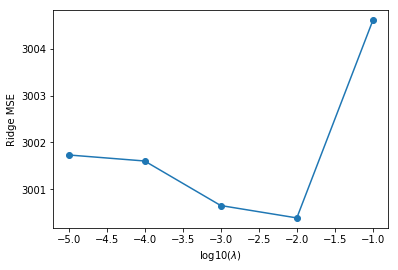

In [164]:
MSE_vs_alpha = ridgemodel.cv_values_.mean(axis=0)

# plot the mean error using plt.semilogx. use `alphas` as the x variable
# what does this plot show?
plt.plot(np.log10(alphas), MSE_vs_alpha, 'o-')
plt.xlabel('log10($\lambda$)')
plt.ylabel('Ridge MSE');

np.argmin(alpha_MSE)

### Now there is a best fit $\lambda = 0.01$, but the MSE is still worse than for OLS. What gives? The reason is that RidgeCV is doing cross validation which splits the data into training and test sets (we'll discuss cross validation next time). That means the model is being fit to only a subset of the data (the training set), whereas the error is evaluated using the test set. Why is this a good thing?

### Split the patients into two groups (training and testing).

In [203]:
ntest = 20

X_train = X[:-ntest, :]
X_test = X[-ntest:, :]

y_train = y[:-ntest]
y_test = y[-ntest:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((422, 10), (20, 10), (422,), (20,))

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.5, random_state=1)

### Now fit the model on the training group only and evaluate the error on the test group only.

3

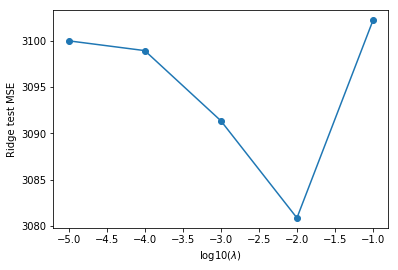

In [212]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
testMSE_vs_alpha = []
for alpha in alphas:
    ridgemodel = Ridge(alpha=alpha)
    # fit to training data
    ridgemodel.fit(X_train, y_train)
    # get prediction error from test data
    yfit = ridgemodel.predict(X_test)
    testMSE_vs_alpha.append(np.mean((y_test - yfit)**2))

plt.plot(np.log10(alphas), testMSE_vs_alpha, 'o-')
plt.xlabel('log10($\lambda$)')
plt.ylabel('Ridge test MSE');

np.argmin(testMSE_vs_alpha)

### How does OLS perform vs. Ridge for $\lambda = 0.01$?

OLS MSE: 3100.1192452983023
Ridge MSE: 3080.8721058383276
OLS R^2: 0.42819757981750517
Ridge R^2: 0.4317476242041831


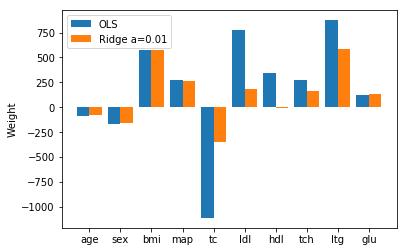

In [214]:
# Fit OLS model to X_train using LinearRegression
olsmodel = ???
???

# Fit Ridge model to X_train for alpha=0.01 using Ridge
ridgemodel = ???
???

# print MSE and R^2 for each model
print("OLS MSE:", ???)
print("Ridge MSE:", ???)
print("OLS R^2:", olsmodel.score(X_test, y_test))
print("Ridge R^2:", ridgemodel.score(X_test, y_test))

# plot weights for each model
xticks = np.arange(len(features))
plt.bar(xticks-0.2, olsmodel.coef_, width=0.4, label='OLS')
plt.bar(xticks+0.2, ridgemodel.coef_, width=0.4, label='Ridge a=0.01')
plt.xticks(xticks, labels=features)
plt.ylabel('Weight')
plt.legend();

### Let's artificially add more features and make them highly coupled. This of course will not be good for linear regression in general, but will ridge regularization mitigate those effects?

OLS MSE: 3218.163326210926
Ridge MSE: 3058.638440760236
OLS R^2: 0.4064249040546535
Ridge R^2: 0.43584851920054846


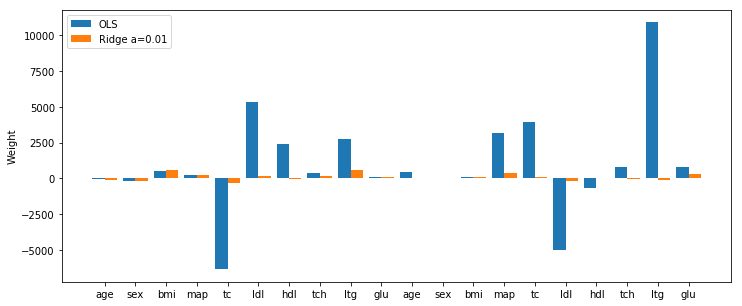

In [216]:
X2 = np.c_[X, X**2]

X_train, X_test, y_train, y_test = train_test_split(X2, y, shuffle=True, test_size=0.5, random_state=1)

# Fit OLS model to X_train
olsmodel = LinearRegression()
olsmodel.fit(X_train, y_train)

# Fit Ridge model to X_train for alpha=0.01
ridgemodel = Ridge(alpha=0.01)
ridgemodel.fit(X_train, y_train)

# print MSE and R^2 for each model
print("OLS MSE:", np.mean((y_test - olsmodel.predict(X_test))**2))
print("Ridge MSE:", np.mean((y_test - ridgemodel.predict(X_test))**2))
print("OLS R^2:", olsmodel.score(X_test, y_test))
print("Ridge R^2:", ridgemodel.score(X_test, y_test))

# plot weights for each model
plt.figure(figsize=(12, 5))
xticks = np.arange(2*len(features))
plt.bar(xticks-0.2, olsmodel.coef_, width=0.4, label='OLS')
plt.bar(xticks+0.2, ridgemodel.coef_, width=0.4, label='Ridge a=0.01')
plt.xticks(xticks, labels=features+features)
plt.ylabel('Weight')
plt.legend();